In [2]:
#Importing the Pandas, Numpy, Matplotlib and Seaborn Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_colwidth', None)
sns.set_style('darkgrid')

In [4]:
#Loading the dataset
df = pd.read_csv('loan.csv')

# Understanding the Data

In [5]:
# Describing the data

df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

## Step 1: Cleaning

### Choosing columns
There are columns with `Nan` values.

In [6]:
df.isna().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


As seen above, there are columns which do not contain any values. Some of the columns contain not but few values.

In [7]:
(df.isna().sum() >= 0.5 * df.shape[0]).sum()

57

57 columns have more than 50% vlues as null. I am choosing not to use them and dropping them from analysis.

In [8]:
column_names = df.columns[df.isna().sum() <= 0.50 * df.shape[0]].tolist()
data_df = df[column_names]
del df
data_df.sample(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
2702,1033063,1262624,12000,12000,11750.0,60 months,12.69%,271.14,B,B5,Aloha Nursing & Rehab Centre,3 years,OWN,60000.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=1033063,"The purpose for the biggest part of this loan is to consolidate my credit cards, this so I can improve my credit rating, simplify my life a bit and save money as well. I also wish to use a small portion of these funds for home improvement. I currently work in a stable job as a registered nurse. I receive about 5000 USD per month in salary, often more depending on the overtime I do. Seeing that I do not have any mortgages to pay for, I will be a very safe bet as I will have enough monthly funds to pay off this loan without problem.",debt_consolidation,Debt consolidation,967xx,HI,17.62,0,Sep-97,0,7,0,11082,69.30%,12,f,0.0,0.0,12376.115350,12118.28,12000.00,376.12,0.0,0.00,0.0,Mar-12,11839.55,Mar-12,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
12697,793653,998182,3025,3025,3025.0,36 months,10.99%,99.03,B,B3,US Air Force,10+ years,MORTGAGE,76793.0,Source Verified,Jun-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.action?loan_id=793653,NaN,debt_consolidation,Lending club,782xx,TX,17.72,0,Oct-93,0,13,1,21057,67.50%,25,f,0.0,0.0,2673.810000,2673.81,2161.96,497.54,0.0,14.31,0.0,Oct-13,99.03,May-16,0.0,1,INDIVIDUAL,0,0.0,0,1.0,0.0
4970,979654,1202812,6000,6000,6000.0,36 months,8.90%,190.52,A,A5,Lowe's Home Improvement,7 years,MORTGAGE,31776.0,Verified,Oct-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.action?loan_id=979654,Borrower added on 10/17/11 > This loan is to refinance my auto loan. I havent missed a payment and I got 9 payments left on this loan. The remaining balance is $6000. Chevy cobalt 2007. Thank you.<br/>,car,2007-cobalt,277xx,NC,18.28,0,Nov-01,1,4,0,2203,76%,8,f,0.0,0.0,6809.055312,6809.06,6000.00,809.06,0.0,0.00,0.0,Mar-14,1669.81,Mar-14,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


Another thing to check in the remaining column is the numbeor of unique values found in the each column

In [9]:
data_df.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

There are columns which contain only 1 value for all the rows. We are choosing not to use them either as they are not adding any information wrt to our target variable

In [10]:
(data_df.nunique() <= 1).sum()

9

9 columns will additionally be removed from our dataset

In [11]:
column_names = data_df.columns[data_df.nunique() > 1]
data_df = data_df[column_names]
data_df.sample(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
35210,437508,525316,20000,20000,19654.88596,36 months,11.83%,662.68,B,B3,Ohio Attorney General's Office,1 year,MORTGAGE,84000.0,Not Verified,Sep-09,Fully Paid,https://lendingclub.com/browse/loanDetail.action?loan_id=437508,credit card debt consolidation,credit_card,credit card debt consolidation,430xx,OH,15.91,0,Nov-94,4,16,0,12870,12.10%,52,0.0,0.0,23856.433820,23435.77,20000.0,3856.43,0.0,0.0,0.0,Sep-12,724.00,Sep-12,0.0
13138,782884,985942,24000,24000,24000.00000,60 months,22.85%,674.51,G,G3,PEARSON CHRYSLER JEEP DODGE,2 years,RENT,72000.0,Source Verified,Jun-11,Fully Paid,https://lendingclub.com/browse/loanDetail.action?loan_id=782884,Borrower added on 06/16/11 > ALL FUNDS USED FOR DEBT CONSOLIDATION!<br/>,other,Other Loan,232xx,VA,14.00,1,May-96,2,11,0,8515,92.60%,19,0.0,0.0,31148.334800,31148.33,24000.0,7148.33,0.0,0.0,0.0,Dec-12,20360.09,May-16,0.0
31048,500297,642489,6500,6500,6500.00000,36 months,15.33%,226.39,D,D3,Total Systems Development,3 years,MORTGAGE,37500.0,Source Verified,Apr-10,Fully Paid,https://lendingclub.com/browse/loanDetail.action?loan_id=500297,"Borrower added on 04/01/10 > My wife and I are expecting a baby in July and need to finish a renovation project before he arrives. His room and bathroom need to be finished. At the moment the two rooms are gutted, with new wiring and plumbing. We have been in the process of remodeling our entire home, finishing projects month by month. Repayment will not affect us financially, as we have been spending around $2500 every month on the remodel. Getting this project done will take a great deal of stress off my wife and I, allowing us to better prepare ourselves for our second child.<br/>",home_improvement,Home Improvement Baby on the Way,403xx,KY,2.88,0,Aug-04,0,2,0,2725,90.80%,3,0.0,0.0,8149.811174,8149.81,6500.0,1649.81,0.0,0.0,0.0,Apr-13,231.61,May-16,0.0


In [12]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [13]:
def get_earliest_yr(x):
    x = int(x.split("-")[1])
    if 0 <= x <= 11:
        return str(2000 + x)
    return str(1900 + x)

In [14]:
data_df['term'] = data_df.term.apply(lambda x: int(x.strip().split(' ')[0]))
data_df['int_rate'] = data_df.int_rate.apply(lambda x: float(x.strip().strip('%')))

In [15]:
data_df['issue_d_month'] = data_df.issue_d.apply(lambda x: x.split('-')[0])
data_df['issue_d_year'] = data_df.issue_d.apply(lambda x: "20" + x.split('-')[1])
data_df = data_df.drop(['issue_d'], axis=1)

In [16]:
data_df['earliest_cr_line_month'] = data_df.earliest_cr_line.apply(lambda x: x.split('-')[0])
data_df['earliest_cr_line_year'] = data_df.earliest_cr_line.apply(get_earliest_yr)
data_df = data_df.drop(['earliest_cr_line'], axis=1)

In [17]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  int64  
 6   int_rate                 39717 non-null  float64
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

## Step 2 Univariate Analysis

# Earliest Credit Line Year

The year the borrower's earliest reported credit line was opened


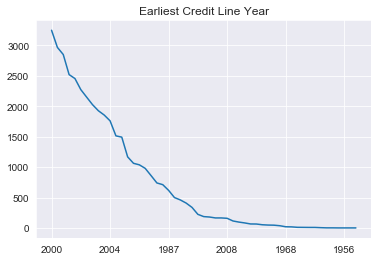

In [18]:
data_df.earliest_cr_line_year.value_counts().plot()
plt.title('Earliest Credit Line Year')
plt.show()

From this description we can understand that the maximum borrowers have their credit line starting in the year 2000

# Earliest Credit Line Month 

The month the borrower's earliest reported credit line was opened


In [19]:
data_df.earliest_cr_line_month.value_counts()

Oct    4076
Dec    4067
Nov    3930
Sep    3593
Jan    3429
Aug    3305
Jul    3062
Jun    2935
May    2903
Feb    2881
Mar    2794
Apr    2742
Name: earliest_cr_line_month, dtype: int64

Text(0.5, 1.0, 'Earliest Credit Line Month')

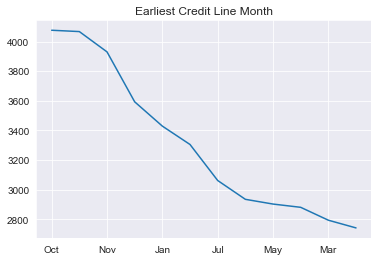

In [20]:
data_df.earliest_cr_line_month.value_counts().plot()
plt.title('Earliest Credit Line Month')

From this graph we can understand that most of the people have prefer to open their credit line in the month of October

# Issued Year and month 

The month and the year in which loan was funded

In [21]:
data_df.issue_d_year.value_counts()

2011    21656
2010    11532
2009     4716
2008     1562
2007      251
Name: issue_d_year, dtype: int64

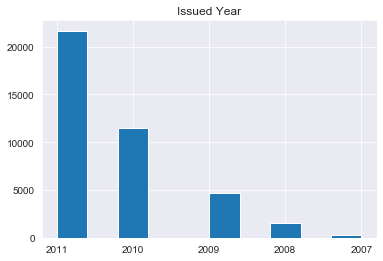

In [22]:
plt.hist(data_df.issue_d_year)
plt.title('Issued Year')
plt.show()

Most of the loans were issued in 2011

In [23]:
data_df.issue_d_month.value_counts()

Dec    4433
Nov    4167
Oct    3934
Sep    3648
Aug    3518
Jul    3476
Jun    3279
May    2999
Apr    2834
Mar    2692
Jan    2379
Feb    2358
Name: issue_d_month, dtype: int64

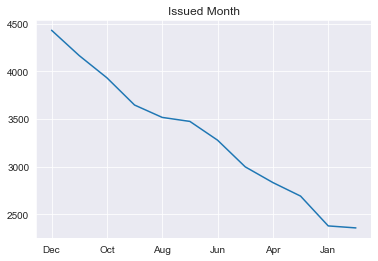

In [24]:
data_df.issue_d_month.value_counts().plot()
plt.title('Issued Month')
plt.show()

Most of the loans were issued in the month of December to the borrowers

# Public Record Bankruptcies

Number of public record bankruptcies

In [25]:
data_df.pub_rec_bankruptcies.value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

From this values only we can understand that there are very few borrowers who have declared bankruptcy and fewer who have declared bankruptcy twice

# Last Credit Pulled date

The most recent month LC pulled the credit for this loan

In [26]:
data_df.last_credit_pull_d.value_counts()


May-16    10308
Apr-16     2547
Mar-16     1123
Feb-13      843
Feb-16      736
Jan-16      657
Dec-15      647
Mar-13      577
Mar-14      564
Dec-14      562
Jul-14      555
Sep-14      546
Jul-15      535
Feb-14      531
Oct-14      529
Nov-15      529
Aug-14      522
Jan-14      516
Sep-15      512
Oct-15      502
Nov-14      497
Apr-14      494
Nov-13      473
May-14      473
Jun-14      466
May-13      448
Jan-15      440
Apr-13      425
May-15      423
Dec-13      422
Aug-15      422
Oct-13      416
Nov-12      404
Jul-13      396
Sep-12      391
Sep-13      390
Apr-15      388
Aug-12      377
Jun-15      375
Dec-12      374
Mar-15      371
Aug-13      370
Jun-13      370
Feb-12      368
Feb-15      358
Mar-12      338
Oct-12      332
May-12      324
Jun-12      308
Apr-12      308
Jul-12      297
Jan-12      258
Mar-11      257
Aug-11      254
Dec-11      245
Nov-11      201
May-11      193
Jun-11      165
Sep-11      157
Jul-11      156
Feb-11      151
Oct-11      148
Apr-11  

# Last Payment Amount

In [27]:
data_df.last_pymnt_amnt.describe()

count    39717.000000
mean      2678.826162
std       4447.136012
min          0.000000
25%        218.680000
50%        546.140000
75%       3293.160000
max      36115.200000
Name: last_pymnt_amnt, dtype: float64

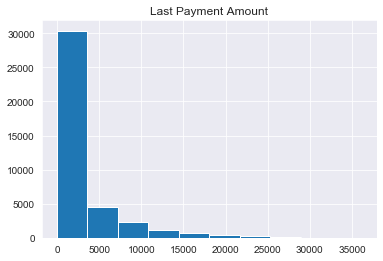

In [28]:
plt.hist(data_df.last_pymnt_amnt)
plt.title("Last Payment Amount")
plt.show()

This graph  shows us that most of the borrower's last transaction was b/w 0-5000

# Last Payment date 

In [29]:
data_df.last_pymnt_d.isna().sum()

71

# Collection Recovery Fee

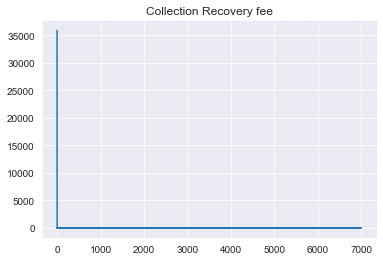

In [30]:
data_df.collection_recovery_fee.value_counts().plot()
plt.title('Collection Recovery fee')
plt.show()

From this chart we can understand that the collection recovery fee is 0 for most of the people and for the rest of them it's even less than 5000

# Recoveries

In [31]:
data_df.recoveries.value_counts()

0.00      35499
10.40         4
11.29         4
19.20         3
13.59         3
          ...  
240.15        1
385.70        1
995.74        1
176.49        1
269.31        1
Name: recoveries, Length: 4040, dtype: int64

In [32]:
data_df.recoveries.describe()

count    39717.000000
mean        95.221624
std        688.744771
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      29623.350000
Name: recoveries, dtype: float64

As we can this column has same observation most of the rows have 0 recovery and the rest have a minimum amunt

# Total Recovered Late Fee

In [33]:
data_df.total_rec_late_fee.value_counts()


0.000000     37671
15.000000      255
15.000000       58
30.000000       55
15.000000       47
             ...  
44.840000        1
16.010000        1
29.914662        1
23.820000        1
47.307614        1
Name: total_rec_late_fee, Length: 1356, dtype: int64

In [34]:
data_df.total_rec_late_fee.describe()

count    39717.000000
mean         1.363015
std          7.289979
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        180.200000
Name: total_rec_late_fee, dtype: float64

Here also we can that the column doesn't have any significant data

# Total Recovery Interest

In [35]:
data_df.total_rec_int.describe()

count    39717.000000
mean      2263.663172
std       2608.111964
min          0.000000
25%        662.180000
50%       1348.910000
75%       2833.400000
max      23563.680000
Name: total_rec_int, dtype: float64

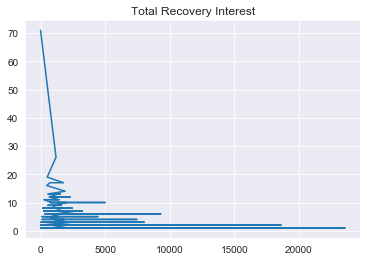

In [36]:
data_df.total_rec_int.value_counts().plot()
plt.title('Total Recovery Interest')
plt.show()

# Total Recovery Principle 

In [37]:
data_df.total_rec_prncp.describe()

count    39717.000000
mean      9793.348813
std       7065.522127
min          0.000000
25%       4600.000000
50%       8000.000000
75%      13653.260000
max      35000.020000
Name: total_rec_prncp, dtype: float64

In [38]:
data_df['total_rec_prncp'].value_counts()

10000.00    2293
12000.00    1805
5000.00     1702
6000.00     1637
15000.00    1400
            ... 
664.25         1
12127.06       1
2957.46        1
19000.01       1
1446.22        1
Name: total_rec_prncp, Length: 7976, dtype: int64

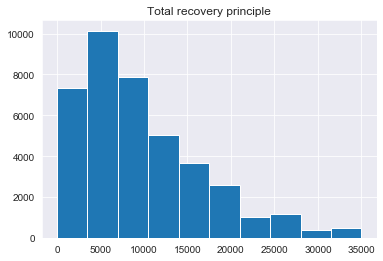

In [39]:
plt.hist(data_df['total_rec_prncp'])
plt.title('Total recovery principle')
plt.show()
#data1['total_rec_late_fee'].value_counts()

# Total Payment Funded by Investors

Total payment received for the amount invested by the investors

In [40]:
data_df.total_pymnt_inv.describe()

count    39717.000000
mean     11567.149118
std       8942.672613
min          0.000000
25%       5112.310000
50%       9287.150000
75%      15798.810000
max      58563.680000
Name: total_pymnt_inv, dtype: float64

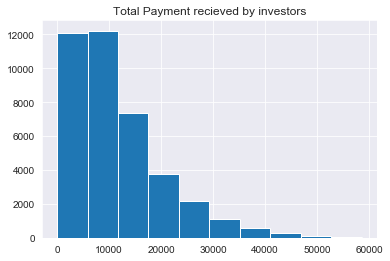

In [41]:
#plt.boxplot(data_df.total_pymnt_inv)
plt.hist(data_df.total_pymnt_inv)
plt.title('Total Payment recieved by investors')
plt.show()

From this we can understand that the maximum payment the investors got for their investment was under 10000 USD

# Total Payment 

In [42]:
data_df['total_pymnt'].value_counts()

11196.569430    26
0.000000        16
11784.232230    16
10956.775960    16
13148.137860    15
                ..
5627.546774      1
32897.190000     1
31624.045580     1
2885.006447      1
5933.760000      1
Name: total_pymnt, Length: 37850, dtype: int64

In [43]:
data_df.total_pymnt.describe()

count    39717.000000
mean     12153.596544
std       9042.040766
min          0.000000
25%       5576.930000
50%       9899.640319
75%      16534.433040
max      58563.679930
Name: total_pymnt, dtype: float64

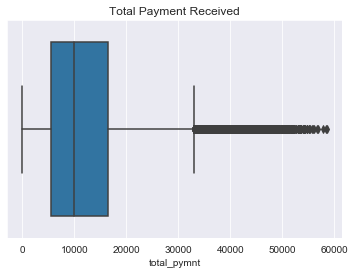

In [44]:
sns.boxplot(data_df['total_pymnt'])
plt.title('Total Payment Received')
plt.show()


In [45]:
data_df.total_pymnt.median()

9899.640319

From this we can understand that the median amount of the total payment received is 9899 USD

# Out Principal Invested by Investors

Remaining outstanding principal for total amount funded by investors

In [46]:
data_df.out_prncp_inv.describe()

count    39717.000000
mean        50.989768
std        373.824457
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       6307.370000
Name: out_prncp_inv, dtype: float64

In [47]:
data_df.out_prncp.value_counts()

0.00       38577
827.13         2
2277.11        2
1972.60        2
2963.24        2
           ...  
1001.31        1
3373.62        1
3505.27        1
952.95         1
40.65          1
Name: out_prncp, Length: 1137, dtype: int64

From the above data we can understand that most of the investors money has been paid

# Out Principal

Remaining outstanding principal for total amount funded


In [48]:
data_df.out_prncp.describe()

count    39717.000000
mean        51.227887
std        375.172839
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       6311.470000
Name: out_prncp, dtype: float64

In [49]:
data_df.out_prncp.value_counts()

0.00       38577
827.13         2
2277.11        2
1972.60        2
2963.24        2
           ...  
1001.31        1
3373.62        1
3505.27        1
952.95         1
40.65          1
Name: out_prncp, Length: 1137, dtype: int64

From these two insights we can understand that most of the people have 0 outstanding principle to be paid

# Total Accounts

The total number of credit lines currently in the borrower's credit file


In [50]:
data_df.total_acc.value_counts()

16    1471
15    1462
17    1457
14    1445
20    1428
18    1422
21    1412
13    1385
19    1341
12    1325
22    1302
11    1278
24    1259
23    1252
10    1193
25    1160
27    1088
9     1080
26    1058
8     1006
28     971
29     931
30     870
7      828
32     794
31     793
6      683
33     647
34     632
35     575
5      552
36     523
37     487
38     452
39     440
4      420
40     322
41     294
42     285
43     258
44     224
46     186
45     184
3      182
47     169
48     148
49     127
50     118
52     101
63      95
53      86
51      82
54      70
55      54
56      48
57      43
61      42
59      39
62      38
58      33
60      28
64       5
66       4
67       4
2        4
65       3
76       2
79       2
75       2
80       1
81       1
90       1
87       1
68       1
74       1
78       1
77       1
70       1
71       1
72       1
73       1
69       1
Name: total_acc, dtype: int64

In [51]:
data_df.total_acc.describe()

count    39717.000000
mean        22.088828
std         11.401709
min          2.000000
25%         13.000000
50%         20.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64

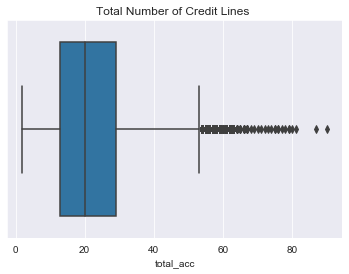

In [53]:
sns.boxplot(data_df.total_acc)
plt.title('Total Number of Credit Lines ')
plt.show()

# Revolving Credit Utilization 

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [72]:
data1 = data_df.revol_util

In [82]:
arr=[]
for i in data1:
        if type(i)== str:
            i= i.rstrip('%')
            arr.append(i)

In [84]:
for i in range(len(arr)):
    arr[i] = float(arr[i])

In [92]:
indi = data_df[data_df.revol_util.isna()].index.tolist()

In [93]:
for j in range(len(indi)):
        arr.insert(indi[j],0)


In [95]:
data_df.revol_util=arr

In [96]:
data_df.revol_util.describe()

count    39717.000000
mean        48.770677
std         28.367689
min          0.000000
25%         25.300000
50%         49.200000
75%         72.300000
max         99.900000
Name: revol_util, dtype: float64

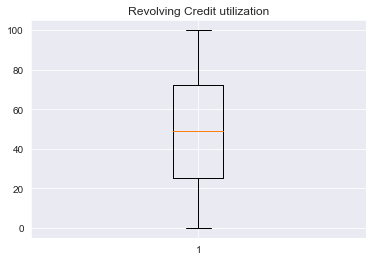

In [97]:
plt.boxplot(data_df.revol_util)
plt.title('Revolving Credit utilization')
plt.show()

From this we can understand the percentage of the revolving credit utilization done by the borrower

# Revolving balance

Total credit revolving balance

In [98]:
data_df.revol_bal.describe()

count     39717.000000
mean      13382.528086
std       15885.016641
min           0.000000
25%        3703.000000
50%        8850.000000
75%       17058.000000
max      149588.000000
Name: revol_bal, dtype: float64

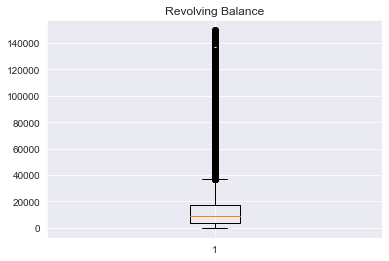

In [105]:
plt.boxplot(data_df.revol_bal)
plt.title('Revolving Balance')
plt.show()

From the initial analysis we can understand that the median of the total revolving balance is less than 9000 USD

# Public Records

The number of derogatory public records

In [106]:
data_df.pub_rec.describe()

count    39717.000000
mean         0.055065
std          0.237200
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: pub_rec, dtype: float64

In [107]:
data_df.pub_rec.value_counts()



0    37601
1     2056
2       51
3        7
4        2
Name: pub_rec, dtype: int64

These number show that the maximum of the borrowers don't have derogaotry public records

# Open Credit lines

The number of open credit lines in the borrower's credit file.

In [108]:
data_df.open_acc.describe()

count    39717.000000
mean         9.294408
std          4.400282
min          2.000000
25%          6.000000
50%          9.000000
75%         12.000000
max         44.000000
Name: open_acc, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x228e090dd08>,
 'caps': [<matplotlib.lines.Line2D at 0x228e0925a08>,
 'boxes': [<matplotlib.lines.Line2D at 0x228e0922848>],
 'medians': [<matplotlib.lines.Line2D at 0x228e0925e88>],
 'fliers': [<matplotlib.lines.Line2D at 0x228e092ba48>],
 'means': []}

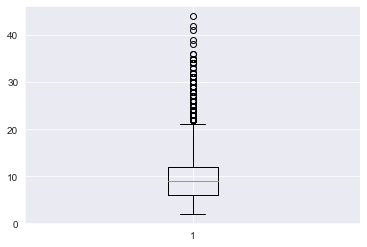

In [109]:
plt.boxplot(data_df.open_acc)

A borrower has on an average 9 credit lines open on his/her name